[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]]
[[   1    5   25  125  625 3125]
 [   0    1   10   75  500 3125]
 [   0    0    2   30  300 2500]]
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]]
[[   1    5   25  125  625 3125]
 [   0    1   10   75  500 3125]
 [   0    0    2   30  300 2500]]
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]]
[[   1    5   25  125  625 3125]
 [   0    1   10   75  500 3125]
 [   0    0    2   30  300 2500]]
[ 0.1         0.10410759  0.10445266  0.10142861  0.09541855  0.08679491
  0.07591896  0.06314036  0.04879675  0.03321326  0.01670209 -0.00043792
 -0.0179218  -0.03547882 -0.05285298 -0.06980345 -0.086105   -0.10154848
 -0.11594122 -0.12910751 -0.14088905 -0.15114536 -0.15975425 -0.16661229
 -0.1716352  -0.17475834 -0.17593714 -0.17514756 -0.17238651 -0.1676723
 -0.16104514 -0.1525675  -0.14232461 -0.1304249  -0.11700045 -0.10220741
 -0.08622648 -0.06926331 -0.05154901 -0.03334053 -0.01492118  0.00339902
  0.0212828   0.03836525  0.05425336  0.06852556  0.

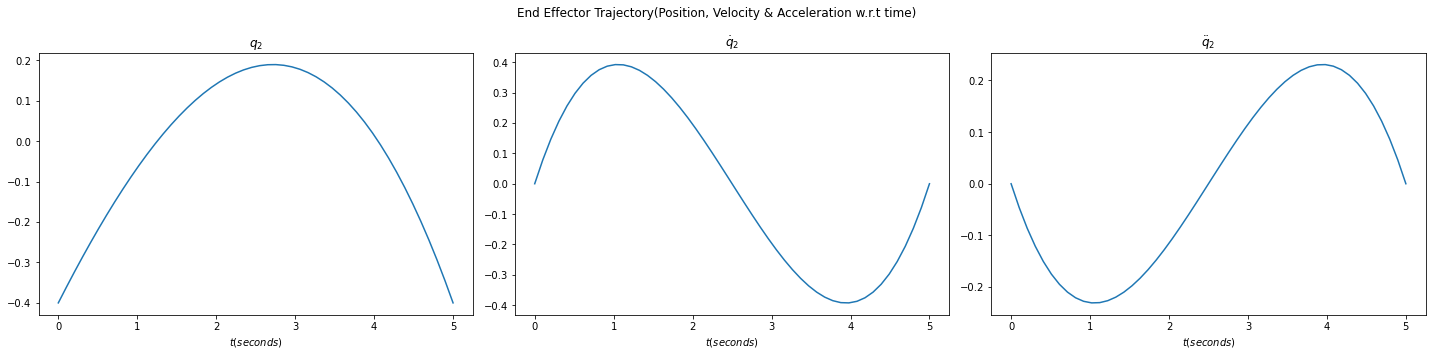

In [1]:
#Shubham Singh
#21250025
#Assignment-6&7

#Task_1

#Secret Code: DEV

import numpy as np
import sympy as sp
from math import comb, factorial
import re
import matplotlib.pyplot as plt
from matplotlib import rc

class PolynomialGenerator():                                    #Polynomial trajectory 
    def __init__(self):
        pass
    def generate_coefficients(self, q_0, q_f, t_f=5.0, t_0=0.0):
        A_0 = self._get_constraint_submatrix(t_0)
        A_f = self._get_constraint_submatrix(t_f)
        A = np.vstack((A_0, A_f))
        q = np.hstack((np.array(q_0), np.array(q_f)))
        return np.linalg.inv(A).dot(q)

    def _get_constraint_submatrix(self, t):                  
        A = np.array([[1, t, t**2, t**3, t**4, t**5],
                      [0, 1, 2 * t, 3 * t**2, 4 * t**3, 5 * t**4],
                      [0, 0, 2, 6 * t, 12 * t**2, 20 * t**3]])
        print(A)
        return A
       
    def polynomial_from_coefs(self, coefs, from_t, to_t, n):
        ts = np.linspace(from_t, to_t, n)
        poly = 0
        for i, coef in enumerate(coefs):
            poly += coef * ts**i
        print (poly)
        return poly

    def dpolynomial_from_coefs(self, d, coefs, from_t, to_t, n):
        ts = np.linspace(from_t, to_t, n)
        poly = 0
        if d >= len(coefs):
            return np.zeros(n)
        for i, coef in enumerate(coefs[d:], d):
            poly += coef * factorial(d) * comb(i, d) * ts**(i - d)
        return poly

class TrajectoryGenerator():
    def __init__(self, dq_max, ddq_max, dx_max, ddx_max, control_freq=0):
        self._pg = PolynomialGenerator()
        self._dq_max = dq_max
        self._ddq_max = ddq_max
        self._dx_max = dx_max
        self._ddx_max = ddx_max
        self._control_freq = control_freq

    def generate_poly_trajectory(self, qs_0, qs_f, t_f,t_0=0.0,n=100,plot=True):
        coefs = []                                                     #Polynomial Coefficients
        for q_0, q_f in zip(qs_0, qs_f):
            coefs.append(self._pg.generate_coefficients(q_0, q_f, t_f, t_0))

        
        qs, dqs, ddqs = [], [], []                                     #Profile
        for c in coefs:
            qs.append(self._pg.polynomial_from_coefs(c, t_0, t_f, n))
            if plot:
                dqs.append(self._pg.dpolynomial_from_coefs(1, c, t_0, t_f, n))
                ddqs.append(self._pg.dpolynomial_from_coefs(2, c, t_0, t_f, n))

        if plot:
            ts = np.linspace(t_0, t_f, n)
            TrajectoriesPlotter.plot_joint(ts, qs, dqs, ddqs)
            
        return np.array(qs).T


class TrajectoriesPlotter():                #for plotting the polynomial trajectory
    
   def plot_joint(ts, qs, dqs, ddqs):
        rc('text', usetex=False)
        fig, axs = plt.subplots(1,3, figsize=(20, 5))
        fig.suptitle("End Effector Trajectory(Position, Velocity & Acceleration w.r.t time)")
        labels = ["", r"\dot", r"\ddot"]
        for i, (q, dq, ddq) in enumerate((qs, dqs, ddqs)):
            plots = [q, dq, ddq]
    
        for j, (plot, label) in enumerate(zip(plots, labels)):
                    axs[j].plot(ts, plot)
                    axs[j].set_title(f"${label}q_{i}$")
                    axs[j].set_xlabel(f'$t(seconds)$')        
        plt.tight_layout()
        plt.show()
        
def main():                                                      #input parameters
    dq_max = 1
    ddq_max = 20
    dx_max = 1
    ddx_max = 10
    cf = 10
    tg = TrajectoryGenerator(dq_max, ddq_max, dx_max, ddx_max, control_freq=cf)
    q_0 = [[0.1, 0.06, -0.4], [-0.9, 0, 0], [0, 0, 0]]             # Initial Position, Velocity and acceleration 
    q_f = [[0.1, 0.01, -0.4], [0.8, 0, 0], [-1.0, 0, 0]]            # Final Position, velocity and acceleration
    t_0, t_f = 0, 5
    qs = tg.generate_poly_trajectory(q_0, q_f, t_f, t_0=t_0, n=50, plot=True)
    
if __name__ == '__main__':
    main()